# <p style="text-align: center;">EE 380L: Data Mining</p>
# <p style="text-align: center;">Assignment 1</p>
## <p style="text-align: center;">Total points: 100</p>
## <p style="text-align: center;">Due: Tuesday, February 19 submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**.   

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

**Note: Notebooks MUST have the images embedded in them. There will be no regrades if attached images do not render in the notebook. Please re download from canvas after submission and make sure all attached images render without errors. (Hint: Image module from IPython.display)**

In this assignment, we will be exploring 4 main problems and a subjective question. 
1. Data exploration and visualization (20 points)
2. Data pre-processing (25 points)
3. Feature extraction (20 points)
4. A problem on k-NN (25 points)
5. ML lifecycle (10 points)

For each of the main problem, you would be generating images to understand the embedded pattern in data and visualise how a classifier would make decisions based on that data. 

The starter code to load the wine quality dataset is given to you. All the packages you would need for this assignment are provided below and please refrain from using any other packages. If you find it necessary to use other packages, please post a question on Piazza or contact the TA. 

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure  
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import soundfile as sf 
      

from matplotlib.cbook import boxplot_stats  # can I use this?


df_red = pd.read_csv("winequality-red.csv", sep=';')
df_white = pd.read_csv("winequality-white.csv", sep=';')

# 1.1. Plot the histogram of the quality score for:

1.1.a. red wine

1.1.b. white wine 

1.1.c. Identify the total number of samples in each dataset. 

1.1.d. Plot the histogram of both the 'quality' data in the same graph. 

1.1.e. Plot the histogram of both the 'quality' data in the same graph after normalization. From the plot, determine the wine that is better in quality and explain. (Hint: Consider normalizing the number of samples across bins. That way, it will be easier to compare the quality of red wine and white wine since they have unequal samples.)

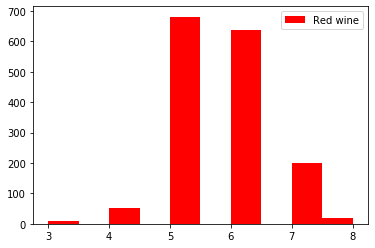

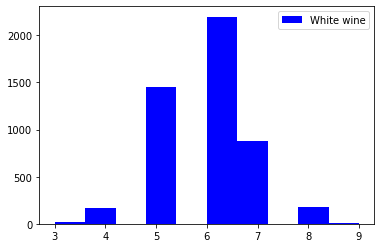

Number of samples for red wine is: 1599
Number of samples for white wine is: 4898


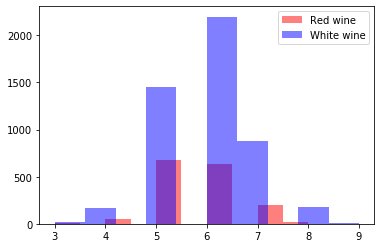

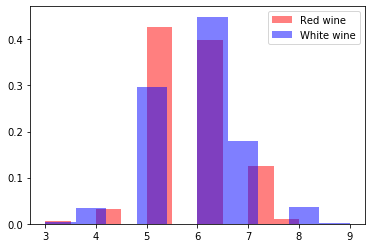

In [18]:
# histogram 1.1.a. red wine
plt.figure()
plt.hist(df_red['quality'],color='r',density=False,label='Red wine')
plt.legend()
plt.show()

# histogram 1.1.a. white wine
plt.figure()
plt.hist(df_white['quality'],color='b',density=False,label='White wine')
plt.legend()
plt.show()
#1.1.c. Identify the total number of samples in each dataset.
N_samps_Red=df_red.shape[0]
N_samps_White=df_white.shape[0]
print('Number of samples for red wine is: {}'.format(N_samps_Red))
print('Number of samples for white wine is: {}'.format(N_samps_White))

#1.1.d. Plot the histogram of both the 'quality' data in the same graph.
plt.figure()
plt.hist(df_red['quality'],color='r',density=False,label='Red wine',alpha = 0.5)
plt.hist(df_white['quality'],color='b',density=False,label='White wine',alpha = 0.5)
plt.legend()
plt.show()

#1.1.e. Plot the histogram of both the 'quality' data in the same graph after normalization. From the plot, determine the wine that is better in quality and explain.
plt.figure()
counts, bins = np.histogram(df_red['quality'])
plt.hist(bins[:-1], bins, weights=counts/N_samps_Red,color='r',label='Red wine',alpha = 0.5)
counts, bins = np.histogram(df_white['quality'])
plt.hist(bins[:-1], bins, weights=counts/N_samps_White,color='b',label='White wine',alpha = 0.5)
plt.legend()
plt.show()

###  Discussion about Q1
In order to have a fair comparison the counts per bin is normalized by the total numebr of samples. For instance for red wines, 45% of wines had quality score of 5. However, maybe around 28% of white wines had quality score of 5. The overall trend seems to show that for quality score 6 and above white wines seems to have higher quality in general since the top scores seems to be more populated for white wines. 

# 1.2. In this part, we will determine the correlation between quality and features. This exercise will help in feature selection in the event of limited data availability. 
Do this separately for red and white wine. 

1.2.a. The resulting correlation plot should be (12x12) matrix. 

1.2.b. You will notice that the diagonal elements would always correlate with a score of 1. Explain the reason. 

1.2.c. List the top 5 features with maximum correlation for quality. 

1.2.d. List two features for each data with positive and negative correlation. 


In [19]:
#1.2.a.correlation matrix for Red wine
print('Red Wine')
corrMatrix_red = df_red.corr()
display(corrMatrix_red)

#1.2.a.correlation matrix for Red wine
print('white Wine')
corrMatrix_white = df_white.corr()
display(corrMatrix_white)

Red Wine


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


white Wine


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


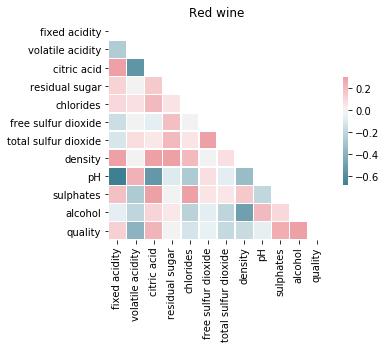

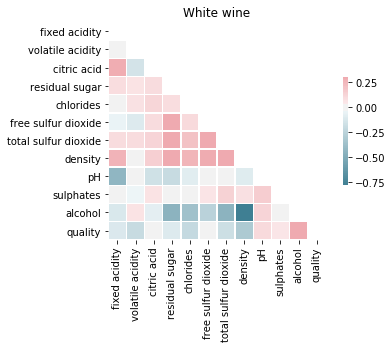

In [20]:
# plot heatmap for better visulization 
#1.2.a.correlation matrix for Red wine
plt.figure()
corrMatrix_red = df_red.corr()
mask = np.triu(np.ones_like(corrMatrix_red, dtype=np.bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corrMatrix_red, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Red wine')

#1.2.a.correlation matrix for Red wine

plt.figure()
corrMatrix_white = df_white.corr()
mask = np.triu(np.ones_like(corrMatrix_white, dtype=np.bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corrMatrix_white, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('White wine')
print('')

## Discussion about Q2
### 1.2.b. You will notice that the diagonal elements would always correlate with a score of 1. Explain the reason.

Obviosuly the correlation matrix shows the correlation between any pair of selected parameters. The diagonal values represents the correlation of any of those features with itself. Obviously any feature has a perfect correlation with itself. Therefore it has a correlation coefficient of 1.  

In [21]:
#1.2.c. List the top 5 features with maximum correlation for quality.
np.fill_diagonal(corrMatrix_red.values, np.nan)
corr_list_red=np.abs(corrMatrix_red)['quality'].sort_values(ascending=False).index[0:5]
print('The top 5 features with maximum correlation with quality of red wine are :', *corr_list_red.values.tolist(), sep='\n- ')

print('')

np.fill_diagonal(corrMatrix_white.values, np.nan)
corr_list_white=np.abs(corrMatrix_white)['quality'].sort_values(ascending=False).index[0:5]
print('The top 5 features with maximum correlation with quality of white wine are :', *corr_list_white.values.tolist(), sep='\n- ')

The top 5 features with maximum correlation with quality of red wine are :
- alcohol
- volatile acidity
- sulphates
- citric acid
- total sulfur dioxide

The top 5 features with maximum correlation with quality of white wine are :
- alcohol
- density
- chlorides
- volatile acidity
- total sulfur dioxide


In [22]:
# 1.2.d. List two features for each data with positive and negative correlation with respect to quality(?)
print('1st example of positive correlation of red   wine quality is {}, with correlation of {}'.format(corrMatrix_red['quality'].sort_values(ascending=False).index[0],round(corrMatrix_red['quality'].sort_values(ascending=False).iloc[0],4)))
print('2nd example of positive correlation of red   wine quality is {}, with correlation of {}'.format(corrMatrix_red['quality'].sort_values(ascending=False).index[1],round(corrMatrix_red['quality'].sort_values(ascending=False).iloc[1],4)))
print('')
print('1st example of positive correlation of red   wine quality is {}, with correlation of {}'.format(corrMatrix_red['quality'].sort_values(ascending=False).index[-2],round(corrMatrix_red['quality'].sort_values(ascending=False).iloc[-2],4)))   
print('2nd example of positive correlation of red   wine quality is {}, with correlation of {}'.format(corrMatrix_red['quality'].sort_values(ascending=False).index[-3],round(corrMatrix_red['quality'].sort_values(ascending=False).iloc[-3],4)))   
print('')
print('1st example of positive correlation of white wine quality is {}, with correlation of {}'.format(corrMatrix_white['quality'].sort_values(ascending=False).index[0],round(corrMatrix_white['quality'].sort_values(ascending=False).iloc[0],4)))
print('2nd example of positive correlation of white wine quality is {}, with correlation of {}'.format(corrMatrix_white['quality'].sort_values(ascending=False).index[1],round(corrMatrix_white['quality'].sort_values(ascending=False).iloc[1],4)))
print('')
print('1st example of positive correlation of white wine quality is {}, with correlation of {}'.format(corrMatrix_white['quality'].sort_values(ascending=False).index[-2],round(corrMatrix_white['quality'].sort_values(ascending=False).iloc[-2],4)))
print('2nd example of positive correlation of white wine quality is {}, with correlation of {}'.format(corrMatrix_white['quality'].sort_values(ascending=False).index[-3],round(corrMatrix_white['quality'].sort_values(ascending=False).iloc[-3],4)))


1st example of positive correlation of red   wine quality is alcohol, with correlation of 0.4762
2nd example of positive correlation of red   wine quality is sulphates, with correlation of 0.2514

1st example of positive correlation of red   wine quality is volatile acidity, with correlation of -0.3906
2nd example of positive correlation of red   wine quality is total sulfur dioxide, with correlation of -0.1851

1st example of positive correlation of white wine quality is alcohol, with correlation of 0.4356
2nd example of positive correlation of white wine quality is pH, with correlation of 0.0994

1st example of positive correlation of white wine quality is density, with correlation of -0.3071
2nd example of positive correlation of white wine quality is chlorides, with correlation of -0.2099


# 1.3. Plot the scatter plot for 'features vs. quality' for red and white wine.
1.3.a. Plot 11 figures with 'each feature vs. quality' for red and white wine. 

1.3.b. For the top two features with positive correlation from the 1.2, do you observe a similar trend in the scatter plot? 

1.3.c. For the top two negatively correlated features from 1.2, do you observe a similar trend in the scatter plot?
If not, why is there a disparity based on the figures? 

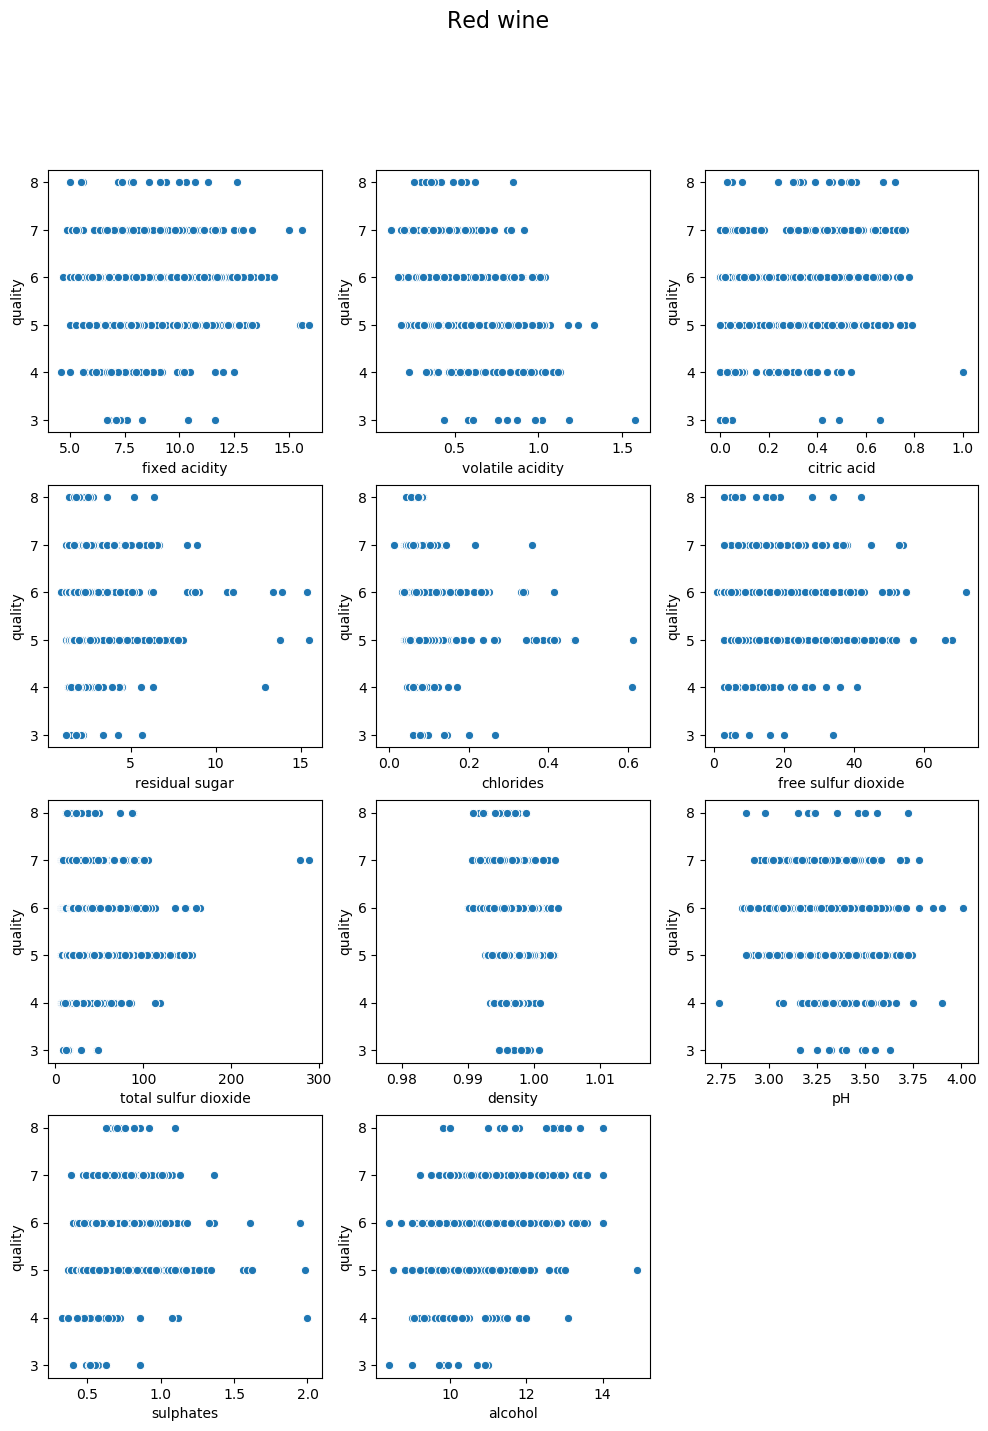

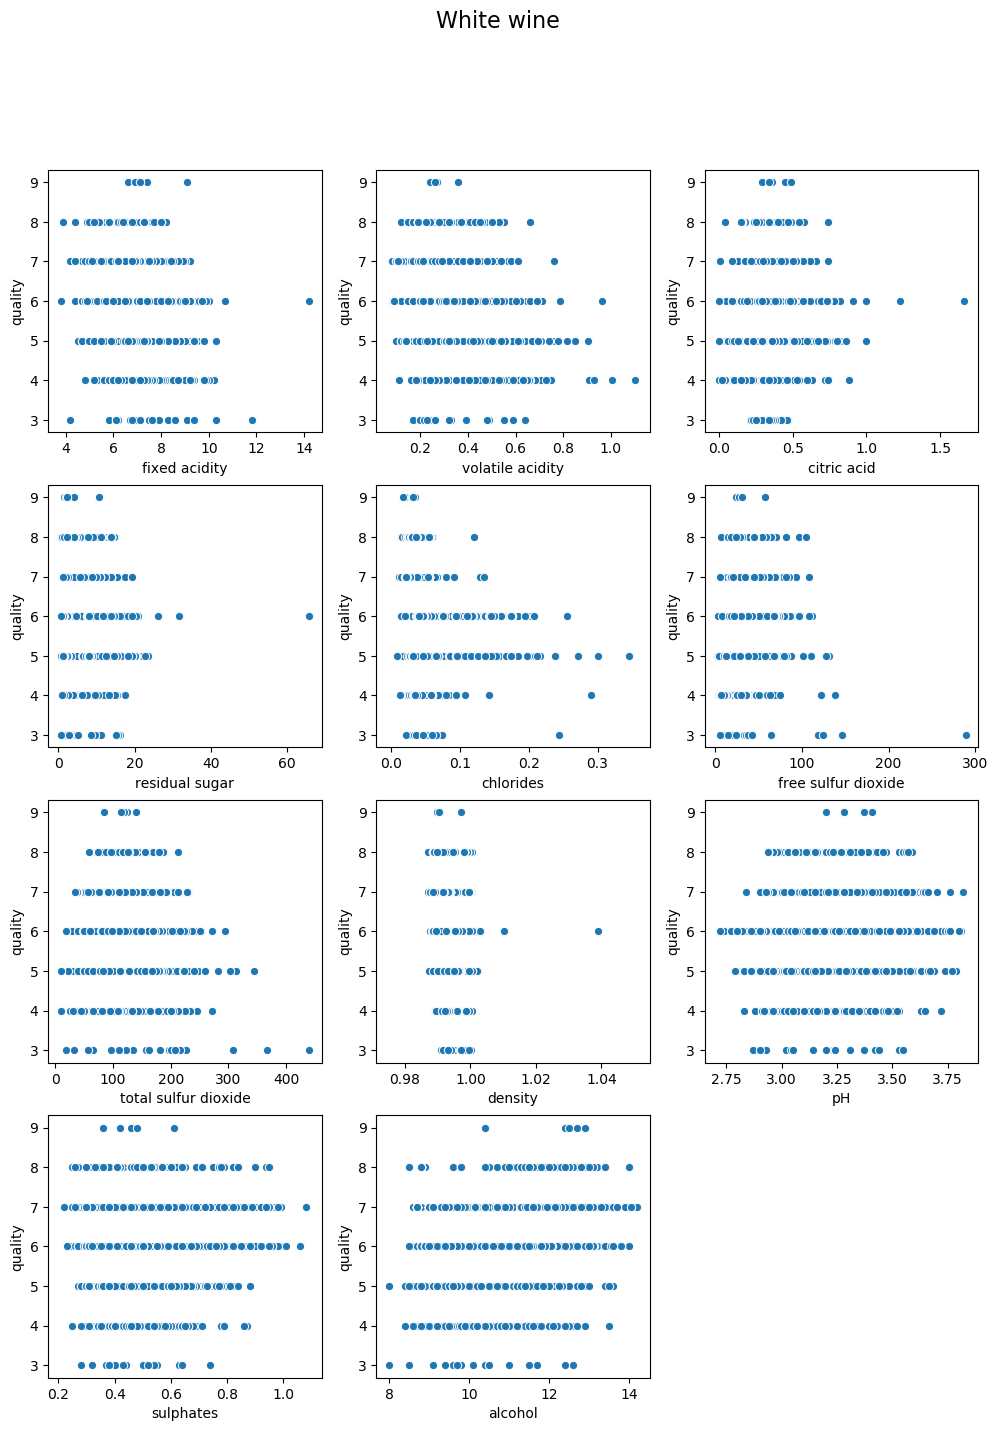

In [23]:

fig=figure(num=None, figsize=(12, 16), dpi=100, facecolor='w', edgecolor='k')
fig.suptitle('Red wine', fontsize=16)
for k,kk in enumerate (df_red.columns[:-1]):
    ax1=plt.subplot(4, 3, k+1)
    sns.scatterplot(x=kk, y="quality", data=df_red)
    

fig=figure(num=None, figsize=(12, 16), dpi=100, facecolor='w', edgecolor='k')
fig.suptitle('White wine', fontsize=16)
for k,kk in enumerate (df_red.columns[:-1]):
    ax1=plt.subplot(4, 3, k+1)
    sns.scatterplot(x=kk, y="quality", data=df_white)    


#### 1.3.b. For the top two features with positive correlation from the 1.2, do you observe a similar trend in the scatter plot?
#### 1.3.c. For the top two negatively correlated features from 1.2, do you observe a similar trend in the scatter plot? If not, why is there a disparity based on the figures? 

for red wine both alchol and sulphates had positive correlation as it is shown in subplot 10th and 11th on the red wine graphs the overall trend has indeed a positive correlation which means by incrase of the these features the quality score goes up. On the other hand, volatile acidity and total sulfur dioxide seems to reduce the quality score by their enhancemnt which matches with negative correlation we got from previous section. It is noteworthy though that as the correlation magnitude showed total sulfur dioxide has weaker correlation.

for white wine both alchol and pH had positive correlation as it is shown in subplot of white wine graphs the overall trend has indeed a positive correlation which means by incrase of the these features the quality score goes up. However, the pH has a pretty weak correlation. Thats why the scatter plots seems to be more flat than having a trend toward positive correlation. On the other hand, density and chlorides seems to reduce the quality score by their enhancemnt which matches with negative correlation we got from previous section. 

# 1.4. Plot the box plot to identify the total number of outlier for top two positive and negatively correlated features 
1.4.a. For red wine data (4 box plots)

1.4.b. For white wine data (4 box plots)

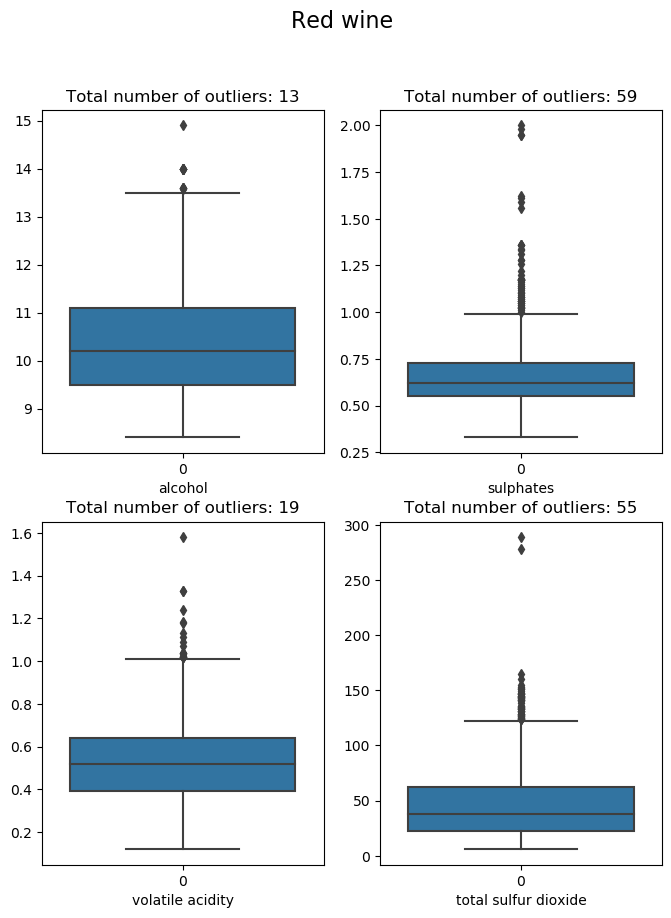

In [24]:
# 1.4.a. For red wine data (4 box plots)

df_red_mdf=df_red[['alcohol','sulphates','volatile acidity','total sulfur dioxide']]
fig=figure(num=None, figsize=(8, 10), dpi=100, facecolor='w', edgecolor='k')
fig.suptitle('Red wine', fontsize=16)
for k,kk in enumerate (df_red_mdf.columns):
    ax1=plt.subplot(2, 2, k+1)
    sns.boxplot(data = df_red_mdf[kk])
    plt.title('Total number of outliers: {}'.format(len(boxplot_stats(df_red_mdf[kk]).pop(0)['fliers'])))
    plt.xlabel(kk)


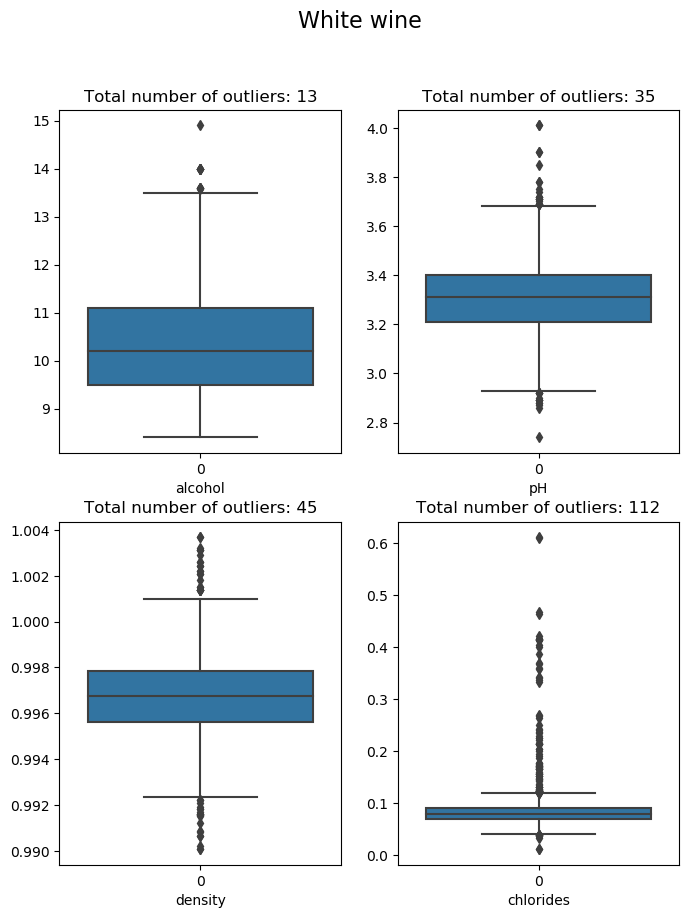

In [25]:
df_red_mdf=df_red[['alcohol','pH','density','chlorides']]
fig=figure(num=None, figsize=(8, 10), dpi=100, facecolor='w', edgecolor='k')
fig.suptitle('White wine', fontsize=16)
for k,kk in enumerate (df_red_mdf.columns):
    ax1=plt.subplot(2, 2, k+1)
    sns.boxplot(data = df_red_mdf[kk])
    plt.title('Total number of outliers: {}'.format(len(boxplot_stats(df_red_mdf[kk]).pop(0)['fliers'])))
    plt.xlabel(kk)

# 2. In this question we will explore data pre-processing: missing values, normalization
2.1.a. Write the code to replace outliers of each feature with NaN. (2 sigma deviation can be used) 

2.1.b. write the code to replace the missing values with mean, median, forward and backward values. Save these as separate dataframes since we would use them again in the last question. 

2.1.c. What is data normalization and how did normalization help in identifying the white wine vs. red wine quality from 1.1.e?

In [26]:
# 2.1.a. Write the code to replace outliers of each feature with NaN. (2 sigma deviation can be used)
df_red_copy=df_red.copy()    
v = df_red_copy.values
mask = np.abs((v - v.mean(0)) / v.std(0)) >2
df_red_copy=pd.DataFrame(np.where(mask, np.nan, v), df_red_copy.index, df_red_copy.columns)
df_red_copy['quality']=df_red['quality']

df_white_copy=df_white.copy()    
v = df_white_copy.values
mask = np.abs((v - v.mean(0)) / v.std(0)) >2
df_white_copy=pd.DataFrame(np.where(mask, np.nan, v), df_white_copy.index, df_white_copy.columns)
df_white_copy['quality']=df_white['quality']


#2.1.b. write the code to replace the missing values with mean, median, forward and backward values. Save these as separate dataframes since we would use them again in the last question.
##### mean
df_red_mean=df_red_copy.copy().fillna(df_red_copy.mean())
df_white_mean=df_white_copy.copy().fillna(df_white_copy.mean())
# ##### median
df_red_median=df_red_copy.copy().fillna(df_red_copy.median())
df_white_median=df_white_copy.copy().fillna(df_white_copy.median())
# ##### forward values
df_red_forward=df_red_copy.copy().fillna(method='ffill')
df_white_forward=df_white_copy.copy().fillna(method='ffill') 
# ##### backward values
df_red_backward=df_red_copy.copy().fillna(method='bfill')
df_white_backward=df_white_copy.copy().fillna(method='bfill')

#### 2.1.c. What is data normalization and how did normalization help in identifying the white wine vs. red wine quality from 1.1.e?

Data normalization is useful when the data set size is not the same for two experiments and we want to compare them. In this assignment, we had two expriments which one of them had significantly more instansts. Therefore comparing the quality of wine just based on the total number of wines in each category of the quality score is not a fair comparison. Thus, we normalized it with the total sample size to get it as a percentage. Consequently the comparison become more fair. 

# 3. Feature extraction: 
In this question, we will take a quick detour to extract spectrogram features from two audio files. 
The started code to load the audio data is provided in this exercise. 

3.1.a. Plot the time vs. amplitude plot of the audio signal. 

3.1.b. Plot the spectrogram for both the audio files. 

3.1.c. Explain the algorithm used to extract the spectrogram. What does the information on the spectogram signify? 


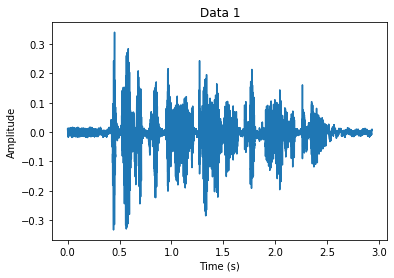

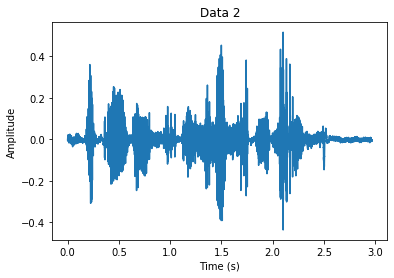

In [27]:
#3.1.a. Plot the time vs. amplitude plot of the audio signal.
data1, samplerate1 = sf.read("61-70968-0006.flac") 
data2, samplerate2 = sf.read("61-70968-0002.flac")
df1 = pd.DataFrame(data1).melt()
plt.figure()
sns.lineplot(x=np.asarray(list(range(0,len(df1['value']))))/samplerate1, y="value", data=df1)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Data 1')
plt.show()

df2 = pd.DataFrame(data2).melt()
plt.figure()
sns.lineplot(x=np.asarray(list(range(0,len(df2['value']))))/samplerate2, y="value", data=df2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Data 2')
plt.show()

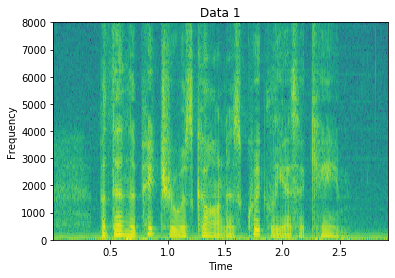

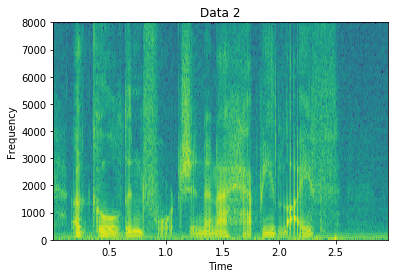

In [28]:
#3.1.b. Plot the spectrogram for both the audio files.
plt.figure()
plt.specgram(data1,Fs=samplerate1)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Data 1')
plt.show()

plt.figure()
plt.specgram(data2,Fs=samplerate2)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Data 2')
plt.show()

#### 3.1.c. Explain the algorithm used to extract the spectrogram. What does the information on the spectogram signify?
the spectrogram split data into NFFT length segments within each the spectrum calculated and plotted. each segment can have a windowing function in each segment with a considered overlap between windows. This is a plot where the horizontal axis is time, and the vertical axis is frequencies, and intensity of different colors shows the amount of energy. So, how loud is the sound at different frequencies and at different time.

The idea is that then we can show at each instant of time what are the range frequencies in the signal. In comparison of two spectrogram we can see that the in general the data2 has lower frequency content during the measurement since it has a higher concentration close to lower frequency while data1 seems to be more uniform in the frequenct domain. Besides we can see that data 1 at low frequency seems to have some sort of repeated pattern in spectrogram which suggest a bit of periodic behavior of the data1 in contrast with data 2. 

# 4. Going back to the wine dataset, we will convert the quality index to categories corresponding to ['low, 'medium', 'high'] and create a k-NN classifier to classify the wine dataset into one of these categories based on features. 
4.1.a. Write the code to convert rating between 0 to 3.5 as low, 3.5 to 7 as medium and 7 to 10 as high. 

4.1.b. Identify the total number of samples for each class and randomly select the same number of samples from the other classes (That is, if there are 65 samples of 'high' quality, randomly pick 65 samples from 'medium' and 65 samples from 'low' and use that to split into train and test)

4.1.c. create a k-NN classifier and report the accuracy using the data from 2.1.b. Report the accuracy in each case.  

4.1.d. create a k-NN classifier, preprocess the input feature using standard scalar to normalize and report the accuracy using the data from 2.1.b. Do you see a difference in accuracy? If yes, explain the reason. 

4.1.e. For a k-NN classifier with the above data, report the accuracy. Plot the prediciton along with the decision boundaries. (Hint: You cannot use all the features and you would have to pick 2 features. Explain the reason behind the choice of those features) 

##### A) Note that per suggestion in question 54 on Piazza (https://piazza.com/class/k5if50e8ite6c9?cid=54) I have changed the threshold for rating of the wines. 

##### B) Note that althought it was expected that standard scalar normalization should help in improving the accuracy but it did not. The idea behind the scalar normalization is the reduce distortion of the cost fucntion that we are trying to minimize. Therefore putting all features in same range of sacles should make the cost function to looks more like a convex function which makes it easier to minimize. Having said that unforunately the accuracy was not better in this case.  per discussion in question 55 on Piazza (https://piazza.com/class/k5if50e8ite6c9?cid=55) as long as we show that we have tried to improve it we should be fine. So I have looped over a range of K values for KNN and selected the one which gave me the best accuracy. 

In [29]:
###### This is with the raw data 
print('raw data:')
df_red = pd.read_csv("winequality-red.csv", sep=';')
df_white = pd.read_csv("winequality-white.csv", sep=';')

# 4.1.a. Write the code to convert rating between 0 to 3.5 as low, 3.5 to 7 as medium and 7 to 10 as high.
list_score=[]
for i in range(df_red.shape[0]):  
    if df_red['quality'].iloc[i]>=6.99:        
        list_score.append('high')
    elif df_red['quality'].iloc[i]<=5.99:
         list_score.append('low')
    else:
         list_score.append('medium')
df_red['quality']= list_score 


list_score=[]
for i in range(df_white.shape[0]):
    if df_white['quality'].iloc[i]>=6.99:
        list_score.append('high')
    elif df_white['quality'].iloc[i]<=5.99:
        list_score.append('low')
    else:
        list_score.append('medium')       
        
df_white['quality']= list_score 


# 4.1.b. Identify the total number of samples for each class and randomly select the same number of samples from the other classes (That is, if there are 65 samples of 'high' quality, randomly pick 65 samples from 'medium' and 65 samples from 'low' and use that to split into train and test)
df_red_out=df_red.groupby(['quality']).agg(['count'])
df_red_out=df_red_out['alcohol', 'count']

df_white_out=df_white.groupby(['quality']).agg(['count'])
df_white_out=df_white_out['alcohol', 'count']

size = np.min(df_red_out)        # sample size
replace = True  # with replacement
fn = lambda obj: obj.loc[np.random.choice(obj.index, size, replace),:]
df_red_knn=df_red.groupby('quality', as_index=False).apply(fn)
df_red_knn=df_red_knn.reset_index()
df_red_knn=df_red_knn.drop(['level_0','level_1'], axis=1)

size = np.min(df_white_out)        # sample size
replace = True  # with replacement
fn = lambda obj: obj.loc[np.random.choice(obj.index, size, replace),:]
df_white_knn=df_white.groupby('quality', as_index=False).apply(fn)
df_white_knn=df_white_knn.reset_index()
df_white_knn=df_white_knn.drop(['level_0','level_1'], axis=1)

yred=df_red_knn['quality']
df_red_knn=df_red_knn.drop(['quality'], axis=1)
Xred=df_red_knn

Xred_train, Xred_test, yred_train, yred_test = train_test_split(Xred, yred, random_state=0)

ywhite=df_white_knn['quality']
df_white_knn=df_white_knn.drop(['quality'], axis=1)
Xwhite=df_white_knn
Xwhite_train, Xwhite_test, ywhite_train, ywhite_test = train_test_split(Xwhite, ywhite, random_state=0)

kn_list=(1,2,3,5,7,10,15,20)
red_score_list=[]
white_score_list=[]
for kn in kn_list:
    knn = neighbors.KNeighborsClassifier(n_neighbors =kn)
    knn.fit(Xred_train, yred_train)
    red_score_list.append(knn.score(Xred_test, yred_test))
    knn.fit(Xwhite_train, ywhite_train)
    white_score_list.append(knn.score(Xwhite_test, ywhite_test))
    
print('without normalization of the features:')   
print('the best accuracy of red wine classifier is {} with K number {}'.format(red_score_list[np.argmax(red_score_list)],kn_list[np.argmax(red_score_list)]))
print('the best accuracy of white wine classifier is {} with K number {}'.format(white_score_list[np.argmax(white_score_list)],kn_list[np.argmax(white_score_list)]))
print('')  

# 4.1.d. create a k-NN classifier, preprocess the input feature using standard scalar to normalize and report the accuracy using the data from 2.1.b. Do you see a difference in accuracy? If yes, explain the reason.
kn_list=(1,2,3,5,7,10)
red_score_list=[]
white_score_list=[]
for kn in kn_list:
    knn = neighbors.KNeighborsClassifier(n_neighbors =kn)
    
    scaler = StandardScaler().fit(Xred_train)
    Xred_test=scaler.transform(Xred_test)
    
    scaler2 = StandardScaler().fit(Xwhite_train)
    Xwhite_test=scaler2.transform(Xwhite_test)
    
    knn.fit(Xred_train, yred_train)
    red_score_list.append(knn.score(Xred_test, yred_test))
    knn.fit(Xwhite_train, ywhite_train)
    white_score_list.append(knn.score(Xwhite_test, ywhite_test))

print('with normalization of the features:')  
print('the best accuracy of red wine classifier is {} with K number {}'.format(red_score_list[np.argmax(red_score_list)],kn_list[np.argmax(red_score_list)]))
print('the best accuracy of white wine classifier is {} with K number {}'.format(white_score_list[np.argmax(white_score_list)],kn_list[np.argmax(white_score_list)]))
print('')  

raw data:
without normalization of the features:
the best accuracy of red wine classifier is 0.5828220858895705 with K number 1
the best accuracy of white wine classifier is 0.7144654088050314 with K number 1

with normalization of the features:
the best accuracy of red wine classifier is 0.37423312883435583 with K number 1
the best accuracy of white wine classifier is 0.4050314465408805 with K number 10



In [32]:
###### This is with the nan values replaced with mean data 
print('mean data:')
df_red = pd.read_csv("winequality-red.csv", sep=';')
df_white = pd.read_csv("winequality-white.csv", sep=';')

df_red_copy=df_red.copy()    
v = df_red_copy.values
mask = np.abs((v - v.mean(0)) / v.std(0)) >2
df_red_copy=pd.DataFrame(np.where(mask, np.nan, v), df_red_copy.index, df_red_copy.columns)
df_red_copy['quality']=df_red['quality']

df_white_copy=df_white.copy()    
v = df_white_copy.values
mask = np.abs((v - v.mean(0)) / v.std(0)) >2
df_white_copy=pd.DataFrame(np.where(mask, np.nan, v), df_white_copy.index, df_white_copy.columns)
df_white_copy['quality']=df_white['quality']


#2.1.b. write the code to replace the missing values with mean, median, forward and backward values. Save these as separate dataframes since we would use them again in the last question.
##### mean
df_red_mean=df_red_copy.fillna(df_red_copy.mean())
df_white_mean=df_white_copy.fillna(df_white_copy.mean())

del df_red 
del df_white

df_red=df_red_mean
df_white=df_white_mean
###### This is with the raw data 
# 4.1.a. Write the code to convert rating between 0 to 3.5 as low, 3.5 to 7 as medium and 7 to 10 as high.
list_score=[]
for i in range(df_red.shape[0]):  
    if df_red['quality'].iloc[i]>=6.99:        
        list_score.append('high')
    elif df_red['quality'].iloc[i]<=5.99:
         list_score.append('low')
    else:
         list_score.append('medium')
df_red['quality']= list_score 


list_score=[]
for i in range(df_white.shape[0]):
    if df_white['quality'].iloc[i]>=6.99:
        list_score.append('high')
    elif df_white['quality'].iloc[i]<=5.99:
        list_score.append('low')
    else:
        list_score.append('medium')       
        
df_white['quality']= list_score 


# 4.1.b. Identify the total number of samples for each class and randomly select the same number of samples from the other classes (That is, if there are 65 samples of 'high' quality, randomly pick 65 samples from 'medium' and 65 samples from 'low' and use that to split into train and test)
df_red_out=df_red.groupby(['quality']).agg(['count'])
df_red_out=df_red_out['alcohol', 'count']

df_white_out=df_white.groupby(['quality']).agg(['count'])
df_white_out=df_white_out['alcohol', 'count']

size = np.min(df_red_out)        # sample size
replace = True  # with replacement
fn = lambda obj: obj.loc[np.random.choice(obj.index, size, replace),:]
df_red_knn=df_red.groupby('quality', as_index=False).apply(fn)
df_red_knn=df_red_knn.reset_index()
df_red_knn=df_red_knn.drop(['level_0','level_1'], axis=1)

size = np.min(df_white_out)        # sample size
replace = True  # with replacement
fn = lambda obj: obj.loc[np.random.choice(obj.index, size, replace),:]
df_white_knn=df_white.groupby('quality', as_index=False).apply(fn)
df_white_knn=df_white_knn.reset_index()
df_white_knn=df_white_knn.drop(['level_0','level_1'], axis=1)

yred=df_red_knn['quality']
df_red_knn=df_red_knn.drop(['quality'], axis=1)
Xred=df_red_knn

Xred_train, Xred_test, yred_train, yred_test = train_test_split(Xred, yred, random_state=0)

ywhite=df_white_knn['quality']
df_white_knn=df_white_knn.drop(['quality'], axis=1)
Xwhite=df_white_knn
Xwhite_train, Xwhite_test, ywhite_train, ywhite_test = train_test_split(Xwhite, ywhite, random_state=0)

kn_list=(1,2,3,5,7,10,15,20)
red_score_list=[]
white_score_list=[]
for kn in kn_list:
    knn = neighbors.KNeighborsClassifier(n_neighbors =kn)
    knn.fit(Xred_train, yred_train)
    red_score_list.append(knn.score(Xred_test, yred_test))
    knn.fit(Xwhite_train, ywhite_train)
    white_score_list.append(knn.score(Xwhite_test, ywhite_test))
    
print('without normalization of the features:')   
print('the best accuracy of red wine classifier is {} with K number {}'.format(red_score_list[np.argmax(red_score_list)],kn_list[np.argmax(red_score_list)]))
print('the best accuracy of white wine classifier is {} with K number {}'.format(white_score_list[np.argmax(white_score_list)],kn_list[np.argmax(white_score_list)]))
print('')  

# 4.1.d. create a k-NN classifier, preprocess the input feature using standard scalar to normalize and report the accuracy using the data from 2.1.b. Do you see a difference in accuracy? If yes, explain the reason.
kn_list=(1,2,3,5,7,10)
red_score_list=[]
white_score_list=[]
for kn in kn_list:
    knn = neighbors.KNeighborsClassifier(n_neighbors =kn)
    
    scaler = StandardScaler().fit(Xred_train)
    Xred_test=scaler.transform(Xred_test)
    
    scaler2 = StandardScaler().fit(Xwhite_train)
    Xwhite_test=scaler2.transform(Xwhite_test)
    
    knn.fit(Xred_train, yred_train)
    red_score_list.append(knn.score(Xred_test, yred_test))
    knn.fit(Xwhite_train, ywhite_train)
    white_score_list.append(knn.score(Xwhite_test, ywhite_test))

print('with normalization of the features:')  
print('the best accuracy of red wine classifier is {} with K number {}'.format(red_score_list[np.argmax(red_score_list)],kn_list[np.argmax(red_score_list)]))
print('the best accuracy of white wine classifier is {} with K number {}'.format(white_score_list[np.argmax(white_score_list)],kn_list[np.argmax(white_score_list)]))
print('')  

mean data:
without normalization of the features:
the best accuracy of red wine classifier is 0.588957055214724 with K number 1
the best accuracy of white wine classifier is 0.7572327044025158 with K number 1

with normalization of the features:
the best accuracy of red wine classifier is 0.3987730061349693 with K number 2
the best accuracy of white wine classifier is 0.5006289308176101 with K number 3



In [33]:
###### This is with nan values replaced with the median data 
print('median data:')
df_red = pd.read_csv("winequality-red.csv", sep=';')
df_white = pd.read_csv("winequality-white.csv", sep=';')

df_red_copy=df_red.copy()    
v = df_red_copy.values
mask = np.abs((v - v.mean(0)) / v.std(0)) >2
df_red_copy=pd.DataFrame(np.where(mask, np.nan, v), df_red_copy.index, df_red_copy.columns)
df_red_copy['quality']=df_red['quality']

df_white_copy=df_white.copy()    
v = df_white_copy.values
mask = np.abs((v - v.mean(0)) / v.std(0)) >2
df_white_copy=pd.DataFrame(np.where(mask, np.nan, v), df_white_copy.index, df_white_copy.columns)
df_white_copy['quality']=df_white['quality']


#2.1.b. write the code to replace the missing values with mean, median, forward and backward values. Save these as separate dataframes since we would use them again in the last question.
#### median
df_red_median=df_red_copy.fillna(df_red_copy.median())
df_white_median=df_white_copy.fillna(df_white_copy.median())
del df_red 
del df_white

df_red=df_red_median
df_white=df_white_median

##### This is with the raw data 
# 4.1.a. Write the code to convert rating between 0 to 3.5 as low, 3.5 to 7 as medium and 7 to 10 as high.
list_score=[]
for i in range(df_red.shape[0]):  
    if df_red['quality'].iloc[i]>=6.99:        
        list_score.append('high')
    elif df_red['quality'].iloc[i]<=5.99:
         list_score.append('low')
    else:
         list_score.append('medium')
df_red['quality']= list_score 

list_score=[]
for i in range(df_white.shape[0]):
    if df_white['quality'].iloc[i]>=6.99:
        list_score.append('high')
    elif df_white['quality'].iloc[i]<=5.99:
        list_score.append('low')
    else:
        list_score.append('medium')       
        
df_white['quality']= list_score 


# 4.1.b. Identify the total number of samples for each class and randomly select the same number of samples from the other classes (That is, if there are 65 samples of 'high' quality, randomly pick 65 samples from 'medium' and 65 samples from 'low' and use that to split into train and test)
df_red_out=df_red.groupby(['quality']).agg(['count'])
df_red_out=df_red_out['alcohol', 'count']

df_white_out=df_white.groupby(['quality']).agg(['count'])
df_white_out=df_white_out['alcohol', 'count']

size = np.min(df_red_out)        # sample size
replace = True  # with replacement
fn = lambda obj: obj.loc[np.random.choice(obj.index, size, replace),:]
df_red_knn=df_red.groupby('quality', as_index=False).apply(fn)
df_red_knn=df_red_knn.reset_index()
df_red_knn=df_red_knn.drop(['level_0','level_1'], axis=1)

size = np.min(df_white_out)        # sample size
replace = True  # with replacement
fn = lambda obj: obj.loc[np.random.choice(obj.index, size, replace),:]
df_white_knn=df_white.groupby('quality', as_index=False).apply(fn)
df_white_knn=df_white_knn.reset_index()
df_white_knn=df_white_knn.drop(['level_0','level_1'], axis=1)

yred=df_red_knn['quality']
df_red_knn=df_red_knn.drop(['quality'], axis=1)
Xred=df_red_knn

Xred_train, Xred_test, yred_train, yred_test = train_test_split(Xred, yred, random_state=0)

ywhite=df_white_knn['quality']
df_white_knn=df_white_knn.drop(['quality'], axis=1)
Xwhite=df_white_knn
Xwhite_train, Xwhite_test, ywhite_train, ywhite_test = train_test_split(Xwhite, ywhite, random_state=0)

kn_list=(1,2,3,5,7,10)
red_score_list=[]
white_score_list=[]
for kn in kn_list:
    knn = neighbors.KNeighborsClassifier(n_neighbors =kn)
    knn.fit(Xred_train, yred_train)
    red_score_list.append(knn.score(Xred_test, yred_test))
    knn.fit(Xwhite_train, ywhite_train)
    white_score_list.append(knn.score(Xwhite_test, ywhite_test))
    
print('without normalization of the features:')   
print('the best accuracy of red wine classifier is {} with K number {}'.format(red_score_list[np.argmax(red_score_list)],kn_list[np.argmax(red_score_list)]))
print('the best accuracy of white wine classifier is {} with K number {}'.format(white_score_list[np.argmax(white_score_list)],kn_list[np.argmax(white_score_list)]))
print('')  

# 4.1.d. create a k-NN classifier, preprocess the input feature using standard scalar to normalize and report the accuracy using the data from 2.1.b. Do you see a difference in accuracy? If yes, explain the reason.
kn_list=(1,2,3,5,7,10,15,20)
red_score_list=[]
white_score_list=[]
for kn in kn_list:
    knn = neighbors.KNeighborsClassifier(n_neighbors =kn)
    
    scaler = StandardScaler().fit(Xred_train)
    Xred_test=scaler.transform(Xred_test)
    
    scaler2 = StandardScaler().fit(Xwhite_train)
    Xwhite_test=scaler2.transform(Xwhite_test)
    
    knn.fit(Xred_train, yred_train)
    red_score_list.append(knn.score(Xred_test, yred_test))
    knn.fit(Xwhite_train, ywhite_train)
    white_score_list.append(knn.score(Xwhite_test, ywhite_test))

print('with normalization of the features:')  
print('the best accuracy of red wine classifier is {} with K number {}'.format(red_score_list[np.argmax(red_score_list)],kn_list[np.argmax(red_score_list)]))
print('the best accuracy of white wine classifier is {} with K number {}'.format(white_score_list[np.argmax(white_score_list)],kn_list[np.argmax(white_score_list)]))
print('')  

median data:
without normalization of the features:
the best accuracy of red wine classifier is 0.6625766871165644 with K number 1
the best accuracy of white wine classifier is 0.6893081761006289 with K number 1

with normalization of the features:
the best accuracy of red wine classifier is 0.48466257668711654 with K number 2
the best accuracy of white wine classifier is 0.39245283018867927 with K number 5



In [34]:
###### This is with nan values replaced with the forward data 
print('forward data:')
df_red = pd.read_csv("winequality-red.csv", sep=';')
df_white = pd.read_csv("winequality-white.csv", sep=';')

df_red_copy=df_red.copy()    
v = df_red_copy.values
mask = np.abs((v - v.mean(0)) / v.std(0)) >2
df_red_copy=pd.DataFrame(np.where(mask, np.nan, v), df_red_copy.index, df_red_copy.columns)
df_red_copy['quality']=df_red['quality']

df_white_copy=df_white.copy()    
v = df_white_copy.values
mask = np.abs((v - v.mean(0)) / v.std(0)) >2
df_white_copy=pd.DataFrame(np.where(mask, np.nan, v), df_white_copy.index, df_white_copy.columns)
df_white_copy['quality']=df_white['quality']


#2.1.b. write the code to replace the missing values with mean, median, forward and backward values. Save these as separate dataframes since we would use them again in the last question.
# ##### forward values
df_red_forward=df_red_copy.copy().fillna(method='ffill')
df_white_forward=df_white_copy.copy().fillna(method='ffill') 
del df_red 
del df_white

df_red=df_red_forward
df_white=df_white_forward

##### This is with the raw data 
# 4.1.a. Write the code to convert rating between 0 to 3.5 as low, 3.5 to 7 as medium and 7 to 10 as high.
list_score=[]
for i in range(df_red.shape[0]):  
    if df_red['quality'].iloc[i]>=6.99:        
        list_score.append('high')
    elif df_red['quality'].iloc[i]<=5.99:
         list_score.append('low')
    else:
         list_score.append('medium')
df_red['quality']= list_score 

list_score=[]
for i in range(df_white.shape[0]):
    if df_white['quality'].iloc[i]>=6.99:
        list_score.append('high')
    elif df_white['quality'].iloc[i]<=5.99:
        list_score.append('low')
    else:
        list_score.append('medium')       
        
df_white['quality']= list_score 


# 4.1.b. Identify the total number of samples for each class and randomly select the same number of samples from the other classes (That is, if there are 65 samples of 'high' quality, randomly pick 65 samples from 'medium' and 65 samples from 'low' and use that to split into train and test)
df_red_out=df_red.groupby(['quality']).agg(['count'])
df_red_out=df_red_out['alcohol', 'count']

df_white_out=df_white.groupby(['quality']).agg(['count'])
df_white_out=df_white_out['alcohol', 'count']

size = np.min(df_red_out)        # sample size
replace = True  # with replacement
fn = lambda obj: obj.loc[np.random.choice(obj.index, size, replace),:]
df_red_knn=df_red.groupby('quality', as_index=False).apply(fn)
df_red_knn=df_red_knn.reset_index()
df_red_knn=df_red_knn.drop(['level_0','level_1'], axis=1)

size = np.min(df_white_out)        # sample size
replace = True  # with replacement
fn = lambda obj: obj.loc[np.random.choice(obj.index, size, replace),:]
df_white_knn=df_white.groupby('quality', as_index=False).apply(fn)
df_white_knn=df_white_knn.reset_index()
df_white_knn=df_white_knn.drop(['level_0','level_1'], axis=1)

yred=df_red_knn['quality']
df_red_knn=df_red_knn.drop(['quality'], axis=1)
Xred=df_red_knn

Xred_train, Xred_test, yred_train, yred_test = train_test_split(Xred, yred, random_state=0)

ywhite=df_white_knn['quality']
df_white_knn=df_white_knn.drop(['quality'], axis=1)
Xwhite=df_white_knn
Xwhite_train, Xwhite_test, ywhite_train, ywhite_test = train_test_split(Xwhite, ywhite, random_state=0)

kn_list=(1,2,3,5,7,10,15,20)
red_score_list=[]
white_score_list=[]
for kn in kn_list:
    knn = neighbors.KNeighborsClassifier(n_neighbors =kn)
    knn.fit(Xred_train, yred_train)
    red_score_list.append(knn.score(Xred_test, yred_test))
    knn.fit(Xwhite_train, ywhite_train)
    white_score_list.append(knn.score(Xwhite_test, ywhite_test))
    
print('without normalization of the features:')   
print('the best accuracy of red wine classifier is {} with K number {}'.format(red_score_list[np.argmax(red_score_list)],kn_list[np.argmax(red_score_list)]))
print('the best accuracy of white wine classifier is {} with K number {}'.format(white_score_list[np.argmax(white_score_list)],kn_list[np.argmax(white_score_list)]))
print('')  

# 4.1.d. create a k-NN classifier, preprocess the input feature using standard scalar to normalize and report the accuracy using the data from 2.1.b. Do you see a difference in accuracy? If yes, explain the reason.
kn_list=(1,2,3,5,7,10)
red_score_list=[]
white_score_list=[]
for kn in kn_list:
    knn = neighbors.KNeighborsClassifier(n_neighbors =kn)
    
    scaler = StandardScaler().fit(Xred_train)
    Xred_test=scaler.transform(Xred_test)
    
    scaler2 = StandardScaler().fit(Xwhite_train)
    Xwhite_test=scaler2.transform(Xwhite_test)
    
    knn.fit(Xred_train, yred_train)
    red_score_list.append(knn.score(Xred_test, yred_test))
    knn.fit(Xwhite_train, ywhite_train)
    white_score_list.append(knn.score(Xwhite_test, ywhite_test))

print('with normalization of the features:')  
print('the best accuracy of red wine classifier is {} with K number {}'.format(red_score_list[np.argmax(red_score_list)],kn_list[np.argmax(red_score_list)]))
print('the best accuracy of white wine classifier is {} with K number {}'.format(white_score_list[np.argmax(white_score_list)],kn_list[np.argmax(white_score_list)]))
print('')  

forward data:
without normalization of the features:
the best accuracy of red wine classifier is 0.6134969325153374 with K number 1
the best accuracy of white wine classifier is 0.7194968553459119 with K number 1

with normalization of the features:
the best accuracy of red wine classifier is 0.39263803680981596 with K number 1
the best accuracy of white wine classifier is 0.44025157232704404 with K number 3



In [35]:
###### This is with nan values replaced withthe backward data 
print('backward data:')
df_red = pd.read_csv("winequality-red.csv", sep=';')
df_white = pd.read_csv("winequality-white.csv", sep=';')

df_red_copy=df_red.copy()    
v = df_red_copy.values
mask = np.abs((v - v.mean(0)) / v.std(0)) >2
df_red_copy=pd.DataFrame(np.where(mask, np.nan, v), df_red_copy.index, df_red_copy.columns)
df_red_copy['quality']=df_red['quality']

df_white_copy=df_white.copy()    
v = df_white_copy.values
mask = np.abs((v - v.mean(0)) / v.std(0)) >2
df_white_copy=pd.DataFrame(np.where(mask, np.nan, v), df_white_copy.index, df_white_copy.columns)
df_white_copy['quality']=df_white['quality']


#2.1.b. write the code to replace the missing values with mean, median, forward and backward values. Save these as separate dataframes since we would use them again in the last question.
df_red_backward=df_red_copy.copy().fillna(method='bfill')
df_white_backward=df_white_copy.copy().fillna(method='bfill')
del df_red 
del df_white

df_red=df_red_backward
df_white=df_white_backward

##### This is with the raw data 
# 4.1.a. Write the code to convert rating between 0 to 3.5 as low, 3.5 to 7 as medium and 7 to 10 as high.
list_score=[]
for i in range(df_red.shape[0]):  
    if df_red['quality'].iloc[i]>=6.99:        
        list_score.append('high')
    elif df_red['quality'].iloc[i]<=5.99:
         list_score.append('low')
    else:
         list_score.append('medium')
df_red['quality']= list_score 

list_score=[]
for i in range(df_white.shape[0]):
    if df_white['quality'].iloc[i]>=6.99:
        list_score.append('high')
    elif df_white['quality'].iloc[i]<=5.99:
        list_score.append('low')
    else:
        list_score.append('medium')       
        
df_white['quality']= list_score 


# 4.1.b. Identify the total number of samples for each class and randomly select the same number of samples from the other classes (That is, if there are 65 samples of 'high' quality, randomly pick 65 samples from 'medium' and 65 samples from 'low' and use that to split into train and test)
df_red_out=df_red.groupby(['quality']).agg(['count'])
df_red_out=df_red_out['alcohol', 'count']

df_white_out=df_white.groupby(['quality']).agg(['count'])
df_white_out=df_white_out['alcohol', 'count']

size = np.min(df_red_out)        # sample size
replace = True  # with replacement
fn = lambda obj: obj.loc[np.random.choice(obj.index, size, replace),:]
df_red_knn=df_red.groupby('quality', as_index=False).apply(fn)
df_red_knn=df_red_knn.reset_index()
df_red_knn=df_red_knn.drop(['level_0','level_1'], axis=1)

size = np.min(df_white_out)        # sample size
replace = True  # with replacement
fn = lambda obj: obj.loc[np.random.choice(obj.index, size, replace),:]
df_white_knn=df_white.groupby('quality', as_index=False).apply(fn)
df_white_knn=df_white_knn.reset_index()
df_white_knn=df_white_knn.drop(['level_0','level_1'], axis=1)

yred=df_red_knn['quality']
df_red_knn=df_red_knn.drop(['quality'], axis=1)
Xred=df_red_knn

Xred_train, Xred_test, yred_train, yred_test = train_test_split(Xred, yred, random_state=0)

ywhite=df_white_knn['quality']
df_white_knn=df_white_knn.drop(['quality'], axis=1)
Xwhite=df_white_knn
Xwhite_train, Xwhite_test, ywhite_train, ywhite_test = train_test_split(Xwhite, ywhite, random_state=0)

kn_list=(1,2,3,5,7,10)
red_score_list=[]
white_score_list=[]
for kn in kn_list:
    knn = neighbors.KNeighborsClassifier(n_neighbors =kn)
    knn.fit(Xred_train, yred_train)
    red_score_list.append(knn.score(Xred_test, yred_test))
    knn.fit(Xwhite_train, ywhite_train)
    white_score_list.append(knn.score(Xwhite_test, ywhite_test))
    
print('without normalization of the features:')   
print('the best accuracy of red wine classifier is {} with K number {}'.format(red_score_list[np.argmax(red_score_list)],kn_list[np.argmax(red_score_list)]))
print('the best accuracy of white wine classifier is {} with K number {}'.format(white_score_list[np.argmax(white_score_list)],kn_list[np.argmax(white_score_list)]))
print('')  

# 4.1.d. create a k-NN classifier, preprocess the input feature using standard scalar to normalize and report the accuracy using the data from 2.1.b. Do you see a difference in accuracy? If yes, explain the reason.
kn_list=(1,2,3,5,7,10)
red_score_list=[]
white_score_list=[]
for kn in kn_list:
    knn = neighbors.KNeighborsClassifier(n_neighbors =kn)
    
    scaler = StandardScaler().fit(Xred_train)
    Xred_test=scaler.transform(Xred_test)
    
    scaler2 = StandardScaler().fit(Xwhite_train)
    Xwhite_test=scaler2.transform(Xwhite_test)
    
    knn.fit(Xred_train, yred_train)
    red_score_list.append(knn.score(Xred_test, yred_test))
    knn.fit(Xwhite_train, ywhite_train)
    white_score_list.append(knn.score(Xwhite_test, ywhite_test))

print('with normalization of the features:')  
print('the best accuracy of red wine classifier is {} with K number {}'.format(red_score_list[np.argmax(red_score_list)],kn_list[np.argmax(red_score_list)]))
print('the best accuracy of white wine classifier is {} with K number {}'.format(white_score_list[np.argmax(white_score_list)],kn_list[np.argmax(white_score_list)]))
print('')  

backward data:
without normalization of the features:
the best accuracy of red wine classifier is 0.6441717791411042 with K number 1
the best accuracy of white wine classifier is 0.7132075471698113 with K number 1

with normalization of the features:
the best accuracy of red wine classifier is 0.3496932515337423 with K number 10
the best accuracy of white wine classifier is 0.410062893081761 with K number 10



median data:
without normalization of the features:
the best accuracy of red wine classifier is 0.6625766871165644 with K number 1
the best accuracy of white wine classifier is 0.6163522012578616 with K number 1

with normalization of the features:
the best accuracy of red wine classifier is 0.5214723926380368 with K number 10
the best accuracy of white wine classifier is 0.3572327044025157 with K number 7



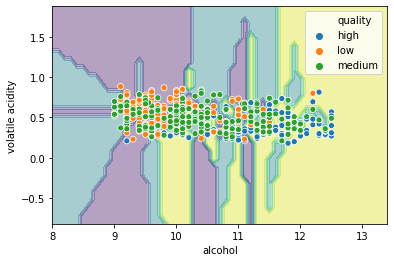

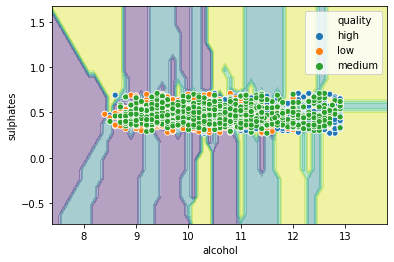

In [36]:
##### This is with the nan values replaced with  median data for decision boundary
print('median data:')
df_red = pd.read_csv("winequality-red.csv", sep=';')
df_white = pd.read_csv("winequality-white.csv", sep=';')

df_red_copy=df_red.copy()    
v = df_red_copy.values
mask = np.abs((v - v.mean(0)) / v.std(0)) >2
df_red_copy=pd.DataFrame(np.where(mask, np.nan, v), df_red_copy.index, df_red_copy.columns)
df_red_copy['quality']=df_red['quality']

df_white_copy=df_white.copy()    
v = df_white_copy.values
mask = np.abs((v - v.mean(0)) / v.std(0)) >2
df_white_copy=pd.DataFrame(np.where(mask, np.nan, v), df_white_copy.index, df_white_copy.columns)
df_white_copy['quality']=df_white['quality']


#2.1.b. write the code to replace the missing values with mean, median, forward and backward values. Save these as separate dataframes since we would use them again in the last question.
#### median
df_red_median=df_red_copy.fillna(df_red_copy.median())
df_white_median=df_white_copy.fillna(df_white_copy.median())
del df_red 
del df_white

df_red=df_red_median
df_white=df_white_median

##### This is with the raw data 
# 4.1.a. Write the code to convert rating between 0 to 3.5 as low, 3.5 to 7 as medium and 7 to 10 as high.
list_score=[]
for i in range(df_red.shape[0]):  
    if df_red['quality'].iloc[i]>=6.99:        
        list_score.append('high')
    elif df_red['quality'].iloc[i]<=5.99:
         list_score.append('low')
    else:
         list_score.append('medium')
df_red['quality']= list_score 

list_score=[]
for i in range(df_white.shape[0]):
    if df_white['quality'].iloc[i]>=6.99:
        list_score.append('high')
    elif df_white['quality'].iloc[i]<=5.99:
        list_score.append('low')
    else:
        list_score.append('medium')       
        
df_white['quality']= list_score 


# 4.1.b. Identify the total number of samples for each class and randomly select the same number of samples from the other classes (That is, if there are 65 samples of 'high' quality, randomly pick 65 samples from 'medium' and 65 samples from 'low' and use that to split into train and test)
df_red_out=df_red.groupby(['quality']).agg(['count'])
df_red_out=df_red_out['alcohol', 'count']

df_white_out=df_white.groupby(['quality']).agg(['count'])
df_white_out=df_white_out['alcohol', 'count']

size = np.min(df_red_out)        # sample size
replace = True  # with replacement
fn = lambda obj: obj.loc[np.random.choice(obj.index, size, replace),:]
df_red_knn=df_red.groupby('quality', as_index=False).apply(fn)
df_red_knn=df_red_knn.reset_index()
df_red_knn=df_red_knn.drop(['level_0','level_1'], axis=1)

size = np.min(df_white_out)        # sample size
replace = True  # with replacement
fn = lambda obj: obj.loc[np.random.choice(obj.index, size, replace),:]
df_white_knn=df_white.groupby('quality', as_index=False).apply(fn)
df_white_knn=df_white_knn.reset_index()
df_white_knn=df_white_knn.drop(['level_0','level_1'], axis=1)

yred=df_red_knn['quality']
df_red_knn=df_red_knn.drop(['quality'], axis=1)
Xred=df_red_knn[['alcohol','volatile acidity']]

Xred_train, Xred_test, yred_train, yred_test = train_test_split(Xred, yred, random_state=0)

ywhite=df_white_knn['quality']
df_white_knn=df_white_knn.drop(['quality'], axis=1)
Xwhite=df_white_knn[['alcohol','sulphates']]
Xwhite_train, Xwhite_test, ywhite_train, ywhite_test = train_test_split(Xwhite, ywhite, random_state=0)

kn_list=(1,2,3,5,7,10)
red_score_list=[]
white_score_list=[]
for kn in kn_list:
    knn = neighbors.KNeighborsClassifier(n_neighbors =kn)
    knn.fit(Xred_train, yred_train)
    red_score_list.append(knn.score(Xred_test, yred_test))
    knn.fit(Xwhite_train, ywhite_train)
    white_score_list.append(knn.score(Xwhite_test, ywhite_test))
    
print('without normalization of the features:')   
print('the best accuracy of red wine classifier is {} with K number {}'.format(red_score_list[np.argmax(red_score_list)],kn_list[np.argmax(red_score_list)]))
print('the best accuracy of white wine classifier is {} with K number {}'.format(white_score_list[np.argmax(white_score_list)],kn_list[np.argmax(white_score_list)]))
print('')  

# 4.1.d. create a k-NN classifier, preprocess the input feature using standard scalar to normalize and report the accuracy using the data from 2.1.b. Do you see a difference in accuracy? If yes, explain the reason.
kn_list=(1,2,3,5,7,10)
red_score_list=[]
white_score_list=[]
for kn in kn_list:
    knn = neighbors.KNeighborsClassifier(n_neighbors =kn)
    
    scaler = StandardScaler().fit(Xred_train)
    Xred_test=scaler.transform(Xred_test)
    
    scaler2 = StandardScaler().fit(Xwhite_train)
    Xwhite_test=scaler2.transform(Xwhite_test)
    
    knn.fit(Xred_train, yred_train)
    red_score_list.append(knn.score(Xred_test, yred_test))
    knn.fit(Xwhite_train, ywhite_train)
    white_score_list.append(knn.score(Xwhite_test, ywhite_test))

print('with normalization of the features:')  
print('the best accuracy of red wine classifier is {} with K number {}'.format(red_score_list[np.argmax(red_score_list)],kn_list[np.argmax(red_score_list)]))
print('the best accuracy of white wine classifier is {} with K number {}'.format(white_score_list[np.argmax(white_score_list)],kn_list[np.argmax(white_score_list)]))
print('')  



# Plotting decision regions for redwine 
plt.figure()
knn = neighbors.KNeighborsClassifier(n_neighbors =1)
knn.fit(Xred_train, yred_train)
x_min, x_max = Xred['alcohol'].min() - 1, Xred['alcohol'].max() + 1
y_min, y_max = Xred['volatile acidity'].min() - 1, Xred['volatile acidity'].max() + 1
xxr, yyr = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))
Z = knn.predict(np.c_[xxr.ravel(), yyr.ravel()])
Z[Z=='high']=1   
Z[Z=='low']=-1  
Z[Z=='medium']=0 
Z = Z.reshape(xxr.shape)
plt.contourf(xxr, yyr, Z, alpha=0.4)
sns.scatterplot(x='alcohol', y="volatile acidity", data=Xred,hue=yred)


# Plotting decision regions for white wine 
plt.figure()
knn = neighbors.KNeighborsClassifier(n_neighbors =1)
knn.fit(Xwhite_train, ywhite_train)
x_min, x_max = Xwhite['alcohol'].min() - 1, Xwhite['alcohol'].max() + 1
y_min, y_max = Xwhite['sulphates'].min() - 1, Xwhite['sulphates'].max() + 1
xxw, yyw = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))
Zw = knn.predict(np.c_[xxw.ravel(), yyw.ravel()])
Zw[Zw=='high']=1   
Zw[Zw=='low']=-1  
Zw[Zw=='medium']=0 
Zw = Zw.reshape(xxw.shape)
plt.contourf(xxw, yyw, Zw, alpha=0.4)
sns.scatterplot(x='alcohol', y="sulphates", data=Xwhite,hue=ywhite)

Overall it in contrast to expectations the normalization of the features seems to reduce the the accuracy score of the KNN clasifiers. 

# 5. ML lifecycle
During different stages of an ML lifecycle, there is always a fine balance between revisiting feature extraction and model parameter determination based on model verification. From the exercise above, briefly explain why feature extraction and feature selection is important for model performance.
How is model complexity increased for a k-NN and how would that affect the model verification step?

#### Answer: 
For sure the choice of the features are important. The idea behing  feature selection is that we need to find features which has the maximum description of variablity of our prediction with a given values for those features. In another words the features which have the maximum contrbution into the score are the one which has the highest correlation coefficient with the quality. 

for the the last part I have selected a series of features pair and I kept the one which had best accuracy among other pairs. Then based on those I have made the decision bouandarie. I beleive that in real life situation I have to use some feature engineering techniques like PCA, or T-SNE to reduce the dimensionality of my system and then use those derived features which should provide the maximumum explanation about variability of my predictions. 

About the model parameters that by reducing the K number the overall behavior was better performance on the training set and worse performance on the test test. This is expected since by reducing the K our model "memrizes" the data in the training set and it is less robust to unseen data. In another words our model sufferes from high variance issue. There are two remedy for that though either increase the dataset size or K number at the expense of loosing performance in the training set.  